# Song Genre Classifier Project

Brief Description: A classifier model that would identify and predict genre of any song given its lyrics.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd

### Importing datasets and viewing

In [2]:
english_lyrics = pd.read_csv('data/english_cleaned_lyrics.csv')
original_lyrics = pd.read_csv('data/original_cleaned_lyrics.csv')

In [3]:
english_lyrics

,Unnamed: 0,index,song,year,artist,genre,lyrics
0,0,0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I'm gonna cut r...
1,1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...
2,2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,3,3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I If I wrote a book about ...
4,4,4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party it's pop...
...,...,...,...,...,...,...,...
218205,362232,362232,who-am-i-drinking-tonight,2012,edens-edge,Country,I gotta say Boy after only just a couple of da...
218206,362233,362233,liar,2012,edens-edge,Country,I helped you find her diamond ring You made me...
218207,362234,362234,last-supper,2012,edens-edge,Country,Look at the couple in the corner booth Looks a...
218208,362235,362235,christ-alone-live-in-studio,2012,edens-edge,Country,When I fly off this mortal earth And I'm measu...


In [4]:
original_lyrics

,Unnamed: 0,index,song,year,artist,genre,lyrics
0,0,0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I'm gonna cut r...
1,1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...
2,2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,3,3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I If I wrote a book about ...
4,4,4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party it's pop...
...,...,...,...,...,...,...,...
227444,362232,362232,who-am-i-drinking-tonight,2012,edens-edge,Country,I gotta say Boy after only just a couple of da...
227445,362233,362233,liar,2012,edens-edge,Country,I helped you find her diamond ring You made me...
227446,362234,362234,last-supper,2012,edens-edge,Country,Look at the couple in the corner booth Looks a...
227447,362235,362235,christ-alone-live-in-studio,2012,edens-edge,Country,When I fly off this mortal earth And I'm measu...


### Dropping irrelevant fields

Since the classifier classifies genre of songs based on its lyrics, dropping fields other than lyrics and genre.

In [5]:
english_lyrics.drop(['Unnamed: 0', 'song', 'year', 'artist'], axis=1, inplace=True)
english_lyrics

,index,genre,lyrics
0,0,Pop,Oh baby how you doing You know I'm gonna cut r...
1,1,Pop,playin everything so easy it's like you seem s...
2,2,Pop,If you search For tenderness It isn't hard to ...
3,3,Pop,Oh oh oh I oh oh oh I If I wrote a book about ...
4,4,Pop,Party the people the people the party it's pop...
...,...,...,...
218205,362232,Country,I gotta say Boy after only just a couple of da...
218206,362233,Country,I helped you find her diamond ring You made me...
218207,362234,Country,Look at the couple in the corner booth Looks a...
218208,362235,Country,When I fly off this mortal earth And I'm measu...


In [6]:
original_lyrics.drop(['Unnamed: 0', 'song', 'year', 'artist'], axis=1, inplace=True)
original_lyrics

,index,genre,lyrics
0,0,Pop,Oh baby how you doing You know I'm gonna cut r...
1,1,Pop,playin everything so easy it's like you seem s...
2,2,Pop,If you search For tenderness It isn't hard to ...
3,3,Pop,Oh oh oh I oh oh oh I If I wrote a book about ...
4,4,Pop,Party the people the people the party it's pop...
...,...,...,...
227444,362232,Country,I gotta say Boy after only just a couple of da...
227445,362233,Country,I helped you find her diamond ring You made me...
227446,362234,Country,Look at the couple in the corner booth Looks a...
227447,362235,Country,When I fly off this mortal earth And I'm measu...


### Checking for missing values, and dropping them

In [7]:
english_lyrics.isnull().sum()

index     0
genre     0
lyrics    0
dtype: int64

In [8]:
original_lyrics.isnull().sum()

index     0
genre     0
lyrics    0
dtype: int64

### Grouping data based on genre

In [9]:
english_lyrics_grouped = english_lyrics.groupby('genre')
english_lyrics_grouped.count()

,index,lyrics
genre,,
Country,14158,14158
Electronic,6942,6942
Folk,1689,1689
Hip-Hop,22654,22654
Indie,2935,2935
Jazz,7310,7310
Metal,21210,21210
Other,3786,3786
Pop,34137,34137


In [10]:
original_lyrics_grouped = original_lyrics.groupby('genre')
original_lyrics_grouped.count()

,index,lyrics
genre,,
Country,14182,14182
Electronic,7231,7231
Folk,1992,1992
Hip-Hop,23215,23215
Indie,2970,2970
Jazz,7520,7520
Metal,22420,22420
Other,3989,3989
Pop,36439,36439


For further analysis in this classifier, we shall only be proceeding with the English Lyrics Dataset.
Thereby, as a result, only English songs can be classified by our model

### Performing tokenization on lyrics

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/pranav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
from nltk.tokenize import word_tokenize

In [13]:
english_lyrics['lyrics'] = english_lyrics.apply(lambda row: nltk.word_tokenize(row['lyrics']), axis=1)
english_lyrics

,index,genre,lyrics
0,0,Pop,"[Oh, baby, how, you, doing, You, know, I, 'm, ..."
1,1,Pop,"[playin, everything, so, easy, it, 's, like, y..."
2,2,Pop,"[If, you, search, For, tenderness, It, is, n't..."
3,3,Pop,"[Oh, oh, oh, I, oh, oh, oh, I, If, I, wrote, a..."
4,4,Pop,"[Party, the, people, the, people, the, party, ..."
...,...,...,...
218205,362232,Country,"[I, got, ta, say, Boy, after, only, just, a, c..."
218206,362233,Country,"[I, helped, you, find, her, diamond, ring, You..."
218207,362234,Country,"[Look, at, the, couple, in, the, corner, booth..."
218208,362235,Country,"[When, I, fly, off, this, mortal, earth, And, ..."


In [14]:
print(english_lyrics.dtypes)

index      int64
genre     object
lyrics    object
dtype: object


### Formatting words (converting to lower case, and removing special characters)

In [15]:
english_lyrics['lyrics'] = english_lyrics['lyrics'].apply(lambda x: [item.lower() for item in x])
english_lyrics

,index,genre,lyrics
0,0,Pop,"[oh, baby, how, you, doing, you, know, i, 'm, ..."
1,1,Pop,"[playin, everything, so, easy, it, 's, like, y..."
2,2,Pop,"[if, you, search, for, tenderness, it, is, n't..."
3,3,Pop,"[oh, oh, oh, i, oh, oh, oh, i, if, i, wrote, a..."
4,4,Pop,"[party, the, people, the, people, the, party, ..."
...,...,...,...
218205,362232,Country,"[i, got, ta, say, boy, after, only, just, a, c..."
218206,362233,Country,"[i, helped, you, find, her, diamond, ring, you..."
218207,362234,Country,"[look, at, the, couple, in, the, corner, booth..."
218208,362235,Country,"[when, i, fly, off, this, mortal, earth, and, ..."


In [16]:
import re

In [17]:
english_lyrics['lyrics'] = english_lyrics['lyrics'].apply(lambda x: [re.sub('\W+', '', item) for item in x])
english_lyrics

,index,genre,lyrics
0,0,Pop,"[oh, baby, how, you, doing, you, know, i, m, g..."
1,1,Pop,"[playin, everything, so, easy, it, s, like, yo..."
2,2,Pop,"[if, you, search, for, tenderness, it, is, nt,..."
3,3,Pop,"[oh, oh, oh, i, oh, oh, oh, i, if, i, wrote, a..."
4,4,Pop,"[party, the, people, the, people, the, party, ..."
...,...,...,...
218205,362232,Country,"[i, got, ta, say, boy, after, only, just, a, c..."
218206,362233,Country,"[i, helped, you, find, her, diamond, ring, you..."
218207,362234,Country,"[look, at, the, couple, in, the, corner, booth..."
218208,362235,Country,"[when, i, fly, off, this, mortal, earth, and, ..."


### Removing stopwords

In [18]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/pranav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
stop = stopwords.words('english')

In [20]:
english_lyrics['lyrics'] = english_lyrics['lyrics'].apply(lambda x: [item for item in x if item not in stop])
english_lyrics

,index,genre,lyrics
0,0,Pop,"[oh, baby, know, gon, na, cut, right, chase, w..."
1,1,Pop,"[playin, everything, easy, like, seem, sure, s..."
2,2,Pop,"[search, tenderness, nt, hard, find, love, nee..."
3,3,Pop,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t..."
4,4,Pop,"[party, people, people, party, popping, sittin..."
...,...,...,...
218205,362232,Country,"[got, ta, say, boy, couple, dates, hands, outr..."
218206,362233,Country,"[helped, find, diamond, ring, made, try, every..."
218207,362234,Country,"[look, couple, corner, booth, looks, lot, like..."
218208,362235,Country,"[fly, mortal, earth, measured, depth, girth, f..."


### Stemming

In [21]:
from nltk.stem.porter import PorterStemmer

In [22]:
port = PorterStemmer()

In [23]:
english_lyrics['lyrics'] = english_lyrics['lyrics'].apply(lambda x: [port.stem(item) for item in x])
english_lyrics

,index,genre,lyrics
0,0,Pop,"[oh, babi, know, gon, na, cut, right, chase, w..."
1,1,Pop,"[playin, everyth, easi, like, seem, sure, stil..."
2,2,Pop,"[search, tender, nt, hard, find, love, need, l..."
3,3,Pop,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t..."
4,4,Pop,"[parti, peopl, peopl, parti, pop, sit, around,..."
...,...,...,...
218205,362232,Country,"[got, ta, say, boy, coupl, date, hand, outrigh..."
218206,362233,Country,"[help, find, diamond, ring, made, tri, everyth..."
218207,362234,Country,"[look, coupl, corner, booth, look, lot, like, ..."
218208,362235,Country,"[fli, mortal, earth, measur, depth, girth, fat..."


### Visualization of average number of words per song per genre

In [24]:
import matplotlib.pyplot as plt

                lyrics
genre                 
Country      94.441305
Electronic  106.757995
Folk        103.551214
Hip-Hop     275.618037
Indie        97.747530
Jazz         89.497401
Metal        93.693258
Other       116.039356
Pop         126.100038
R&B         114.798861
Rock         99.204102


<AxesSubplot:xlabel='genre'>

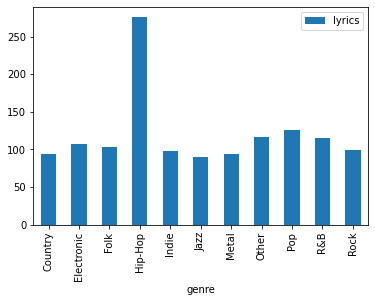

In [25]:
word_count_df = pd.DataFrame({'genre': english_lyrics['genre'], 'lyrics': english_lyrics['lyrics'].str.len()})
word_count_df = word_count_df.groupby('genre')
word_count_df = word_count_df.mean()
print(word_count_df)

word_count_df.plot(kind='bar', y='lyrics')

### Visualization for top 10 used words per genre

In [26]:
word_genre_df = english_lyrics.groupby('genre')
word_genre_agg_df = word_genre_df.agg({'lyrics': lambda x: list(x)})
for i in range(word_genre_agg_df['lyrics'].shape[0]):
    word_genre_agg_df['lyrics'][i] = word_genre_agg_df['lyrics'][i][0]
word_genre_agg_df

,lyrics
genre,
Country,"[vers, 1, last, breath, life, gone, bodi, lip,..."
Electronic,"[revers, behold, finit, set, thirteen, convex,..."
Folk,"[rise, fall, like, tide, hand, goe, chest, ste..."
Hip-Hop,"[horn, choru, timbo, hit, phone, betta, know, ..."
Indie,"[nt, feel, bad, way, wheel, turn, stay, quiet,..."
Jazz,"[way, leav, today, leav, hurri, find, place, c..."
Metal,"[god, mountain, sky, forest, sea, land, fire, ..."
Other,"[littl, thin, band, finger, left, hand, wear, ..."
Pop,"[oh, babi, know, gon, na, cut, right, chase, w..."


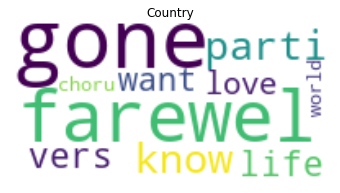

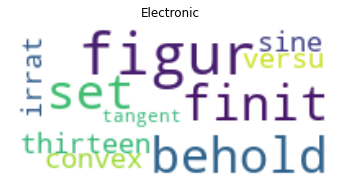

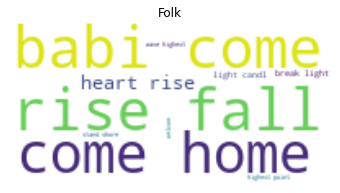

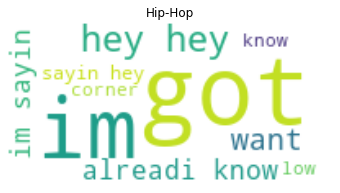

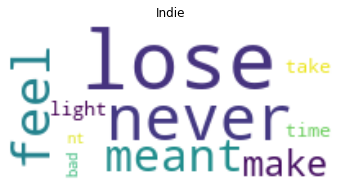

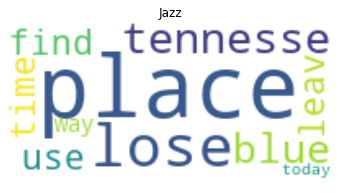

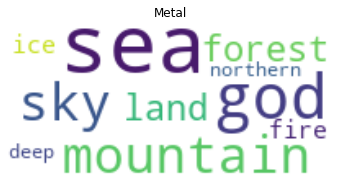

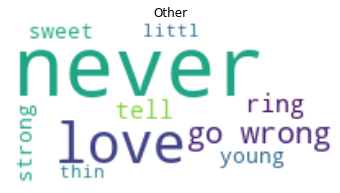

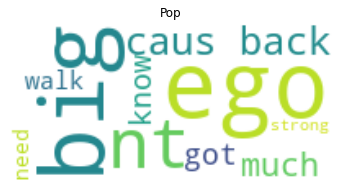

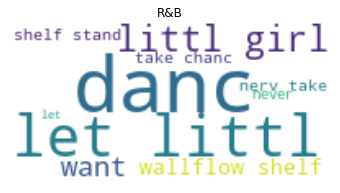

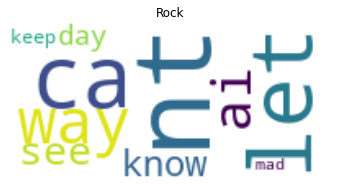

In [27]:
from wordcloud import WordCloud

for i in range(word_genre_agg_df.shape[0]):
    merged_string = (" ").join(word_genre_agg_df['lyrics'][i])
    word_cloud = WordCloud(height = 100, width = 200, background_color='white', max_words=10).generate(merged_string)
    plt.figure(figsize=(8,3))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(word_genre_agg_df.index[i])
    plt.axis('off')
    plt.show()
    plt.close()

### Feature extraction using tf-idf method

In [28]:
global_lyrics = []

for i in range(len(english_lyrics)):
    song_lyrics_merged = (" ").join(english_lyrics['lyrics'][i])
    global_lyrics.append(song_lyrics_merged)
    
global_lyrics[:3]

['oh babi know gon na cut right chase women made like think creat special purpos know special feel babi let get lost nt need call work caus boss real want show feel consid lucki big deal well got key heart ai nt gon na need rather open bodi show secret nt know insid need lie big wide strong wo nt fit much tough talk like caus back got big ego huge ego love big ego much walk like caus back usual humbl right nt choos leav could blue call arrog call confid decid find work damn know kill leg better yet thigh matter fact smile mayb eye boy site see kind someth like big wide strong wo nt fit much tough talk like caus back got big ego huge ego love big ego much walk like caus back walk like caus back talk like caus back back back walk like caus back big wide strong wo nt fit much tough talk like caus back got big ego huge ego huge ego love big ego much walk like caus back ego big must admit got everi reason feel like bitch ego strong ai nt know nt need beat sing piano',
 'playin everyth easi 

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf = True)
tfIdf = tfidfVectorizer.fit_transform(global_lyrics)
tf_idf_df = pd.DataFrame(tfIdf[0].T.todense(), index=tfidfVectorizer.get_feature_names(), columns=["tf-idf"])
tf_idf_df = tf_idf_df.sort_values('tf-idf', ascending=False)

tf_idf_df

,tf-idf
ego,0.652454
big,0.335330
huge,0.255501
back,0.217286
caus,0.196385
...,...
friction,0.000000
fricta,0.000000
frickley,0.000000
frickiti,0.000000


### Multinomial Naive Bayes Classifier

In [30]:
english_lyrics['merged_lyrics'] = global_lyrics

english_lyrics

,index,genre,lyrics,merged_lyrics
0,0,Pop,"[oh, babi, know, gon, na, cut, right, chase, w...",oh babi know gon na cut right chase women made...
1,1,Pop,"[playin, everyth, easi, like, seem, sure, stil...",playin everyth easi like seem sure still way d...
2,2,Pop,"[search, tender, nt, hard, find, love, need, l...",search tender nt hard find love need live look...
3,3,Pop,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t...",oh oh oh oh oh oh wrote book stand titl book w...
4,4,Pop,"[parti, peopl, peopl, parti, pop, sit, around,...",parti peopl peopl parti pop sit around see loo...
...,...,...,...,...
218205,362232,Country,"[got, ta, say, boy, coupl, date, hand, outrigh...",got ta say boy coupl date hand outright blow m...
218206,362233,Country,"[help, find, diamond, ring, made, tri, everyth...",help find diamond ring made tri everyth tomorr...
218207,362234,Country,"[look, coupl, corner, booth, look, lot, like, ...",look coupl corner booth look lot like look win...
218208,362235,Country,"[fli, mortal, earth, measur, depth, girth, fat...",fli mortal earth measur depth girth father say...


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(english_lyrics['merged_lyrics'], english_lyrics['genre'], test_size=0.2)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [32]:
y_pred = pd.DataFrame(clf.predict(count_vect.transform(X_test)), columns=['genre'])
y_pred

,genre
0,Rock
1,Rock
2,Rock
3,Rock
4,Rock
...,...
43637,Rock
43638,Rock
43639,Rock
43640,Rock


In [33]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=english_lyrics['genre'].unique()))

/home/pranav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pranav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         Pop       0.50      0.00      0.00      2813
     Hip-Hop       0.50      0.00      0.00      1410
        Rock       0.00      0.00      0.00       342
       Metal       0.83      0.53      0.65      4554
       Other       0.00      0.00      0.00       580
     Country       0.67      0.00      0.00      1477
        Jazz       0.87      0.19      0.31      4182
  Electronic       1.00      0.00      0.00       744
        Folk       0.43      0.03      0.05      6829
         R&B       0.00      0.00      0.00       665
       Indie       0.50      0.98      0.66     20046

    accuracy                           0.53     43642
   macro avg       0.48      0.16      0.15     43642
weighted avg       0.56      0.53      0.41     43642



/home/pranav/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Training complete model

In [34]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(english_lyrics['merged_lyrics'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

model = MultinomialNB().fit(X_train_tfidf, english_lyrics['genre'])

### Future Prediction Results

In [35]:
lyrics = pd.read_csv('data/lyrics_to_predict.csv')
lyrics

,lyrics
0,"I found a love for me Oh darling, just dive ri..."
1,"Had to have high, high hopes for a living Shoo..."
2,Heart beats fast Colors and promises How to be...
3,"Trap, TrapMoneyBenny This shit got me in my fe..."
4,Tastes like strawberries On a summer evenin' A...


In [36]:
lyrics['lyrics'] = lyrics.apply(lambda row: nltk.word_tokenize(row['lyrics']), axis=1)
lyrics['lyrics'] = lyrics['lyrics'].apply(lambda x: [item.lower() for item in x])
lyrics['lyrics'] = lyrics['lyrics'].apply(lambda x: [re.sub('\W+', '', item) for item in x])
lyrics['lyrics'] = lyrics['lyrics'].apply(lambda x: [item for item in x if item not in stop])
lyrics['lyrics'] = lyrics['lyrics'].apply(lambda x: [port.stem(item) for item in x])

all_lyrics = []

for i in range(len(lyrics)):
    song_lyrics_merged = (" ").join(lyrics['lyrics'][i])
    all_lyrics.append(song_lyrics_merged)
    
lyrics['lyrics'] = all_lyrics
lyrics

,lyrics
0,found love oh darl dive right follow lead wel...
1,high high hope live shoot star could nt make ...
2,heart beat fast color promis brave love afrai...
3,trap trapmoneybenni shit got feel got ta real...
4,tast like strawberri summer evenin sound like...


In [37]:
genre_pred = pd.DataFrame(model.predict(count_vect.transform(lyrics['lyrics'])), columns=['genre'])
genre_pred
lyrics['genre'] = genre_pred
lyrics

,lyrics,genre
0,found love oh darl dive right follow lead wel...,Rock
1,high high hope live shoot star could nt make ...,Rock
2,heart beat fast color promis brave love afrai...,Rock
3,trap trapmoneybenni shit got feel got ta real...,Hip-Hop
4,tast like strawberri summer evenin sound like...,Rock
